<a href="https://colab.research.google.com/github/aviraljoshi23/Weather_Data_analysis/blob/main/Weather_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview about climate revolving
Earth's climate is changing. The more greenhouse gases we emit, the larger future climate changes will be. ... Human activities, like driving, manufacturing, electricity generation, and the clearing of forests contribute to greenhouse gas emissions and warm the planet.According to NOAA's 2020 Annual Climate Report the combined land and ocean temperature has increased at an average rate of 0.08 degrees Celsius per decade since 1880. However, the average rate of increase since 1981 (0.18°C / 0.32°F) has been more than twice that rate.

Let try to study the changes in the environment factor over the years in the dataset provided. It corresponds to Finland, a country in the Northern Europe. Tt is a 10 years data ranging from the year 2006 to 2016.

#Problem Statement
We feel, if we closely study the Weather Data, we should be able to identify patterns and identify correlating factors on key levels of climate change across the country. > The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"

Given:

The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".

The Alternative Hypothesis H1 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded= files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [203]:
df=pd.read_csv("weatherHistory.csv")

In [204]:
df.shape

(96453, 12)

In [205]:
df.head()

Formatted Date  ...                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.

[5 rows x 12 columns]

In [206]:
df.tail()

Formatted Date  ...                           Daily Summary
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting in the morning.

[5 rows x 12 columns]

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [208]:
df.describe()

Temperature (C)  ...  Pressure (millibars)
count     96453.000000  ...          96453.000000
mean         11.932678  ...           1003.235956
std           9.551546  ...            116.969906
min         -21.822222  ...              0.000000
25%           4.688889  ...           1011.900000
50%          12.000000  ...           1016.450000
75%          18.838889  ...           1021.090000
max          39.905556  ...           1046.380000

[8 rows x 8 columns]

#Calculating missing values in the dataset

In [209]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [210]:
missing_values_count = df.isnull().sum()
total_cells=np.product(df.shape)
total_missing=missing_values_count.sum()
print('Percent of data that is missing:-',(total_missing/total_cells)*100)

Percent of data that is missing:- 0.04466769652922494


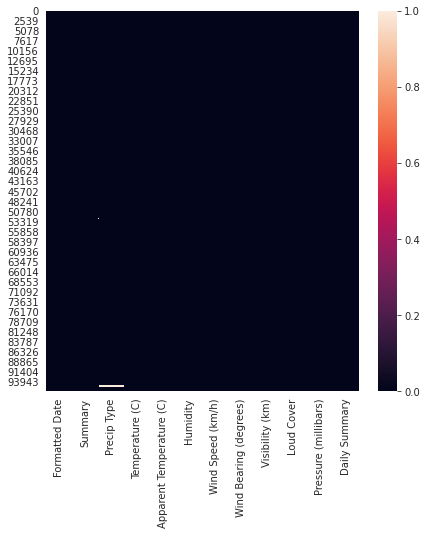

In [211]:
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull())

In [212]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [213]:
df=df.fillna(method='ffill')
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

It looks like we just having small number of missing value in the dataset in precip_type column

In [214]:
#DataFrame for Duplicate Values
df_duplicated = df[df.duplicated()]
df_duplicated

Formatted Date  ...                                      Daily Summary
36072  2010-08-02 00:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36073  2010-08-02 01:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36074  2010-08-02 02:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36075  2010-08-02 03:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36076  2010-08-02 04:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36077  2010-08-02 05:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36078  2010-08-02 06:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36079  2010-08-02 07:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36080  2010-08-02 08:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36081  2010-08-02 09:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36082  2010-08-02 10:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36083  2010-08-02 11:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36084  2010-08-02 12:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36085  2010-08-02 13:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36086  2010-08-02 14:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36087  2010-08-02 15:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36088  2010-08-02 16:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36089  2010-08-02 17:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36090  2010-08-02 18:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36091  2010-08-02 19:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36092  2010-08-02 20:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36093  2010-08-02 21:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36094  2010-08-02 22:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36095  2010-08-02 23:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...

[24 rows x 12 columns]

In [215]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [216]:
#Changing the formmatted date data type
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [217]:
#Setting the formatted date column as index 
df=df.set_index('Formatted Date')
df.head()

Summary  ...                      Daily Summary
Formatted Date                            ...                                   
2006-03-31 22:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.

[5 rows x 11 columns]

In [218]:
#Finding the unique values in each column
for col in df.columns:
  print("We have {} unique values in {} column".format(len(df[col].unique()),col))
  print('_ _'*15)

We have 27 unique values in Summary column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 2 unique values in Precip Type column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 7574 unique values in Temperature (C) column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 8984 unique values in Apparent Temperature (C) column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 90 unique values in Humidity column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 2484 unique values in Wind Speed (km/h) column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 360 unique values in Wind Bearing (degrees) column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 949 unique values in Visibility (km) column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 1 unique values in Loud Cover column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 4979 unique values in Pressure (millibars) column
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
We have 214 unique valu

In [219]:
df['Loud Cover'].unique()

array([0.])

In [220]:
df=df.drop(columns='Loud Cover',axis=1)

In [221]:
df.corr()

Temperature (C)  ...  Pressure (millibars)
Temperature (C)                  1.000000  ...             -0.005447
Apparent Temperature (C)         0.992629  ...             -0.000219
Humidity                        -0.632255  ...              0.005454
Wind Speed (km/h)                0.008957  ...             -0.049263
Wind Bearing (degrees)           0.029988  ...             -0.011651
Visibility (km)                  0.392847  ...              0.059818
Pressure (millibars)            -0.005447  ...              1.000000

[7 rows x 7 columns]

In [222]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [223]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

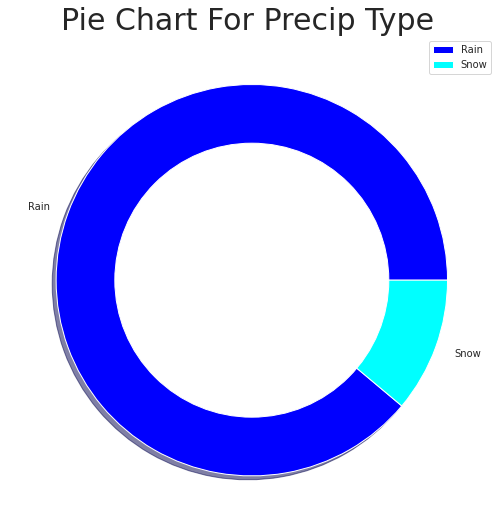

In [224]:
size=[85741,10712]
colors=['blue','Cyan']
label= 'Rain','Snow'
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = label, shadow = True)
plt.title('Pie Chart For Precip Type ', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

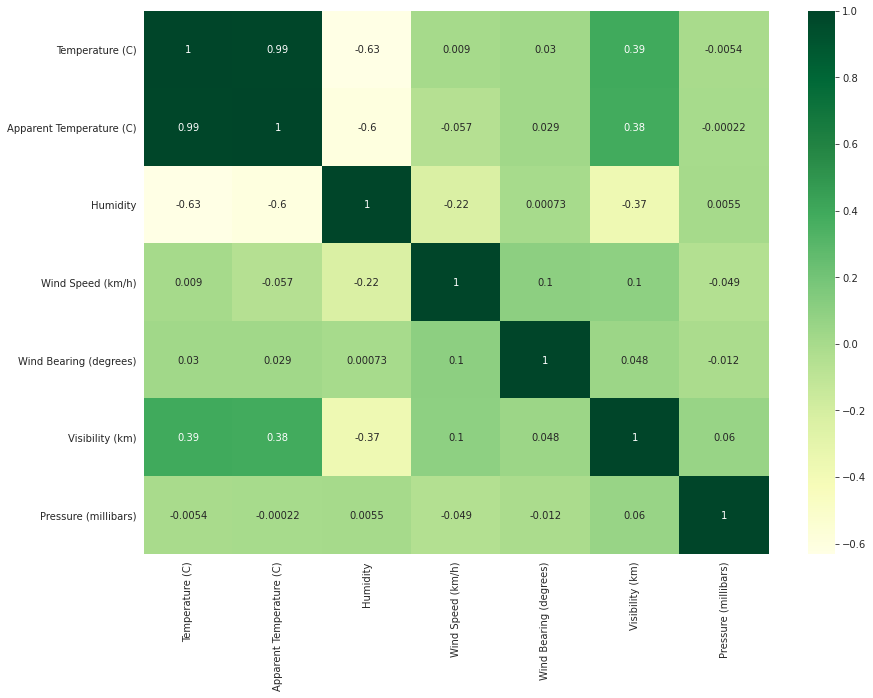

In [225]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df.corr(),annot=True,cmap='YlGn')
plt.show()

In [226]:
# Setting plot style
sns.set_style(style='whitegrid')

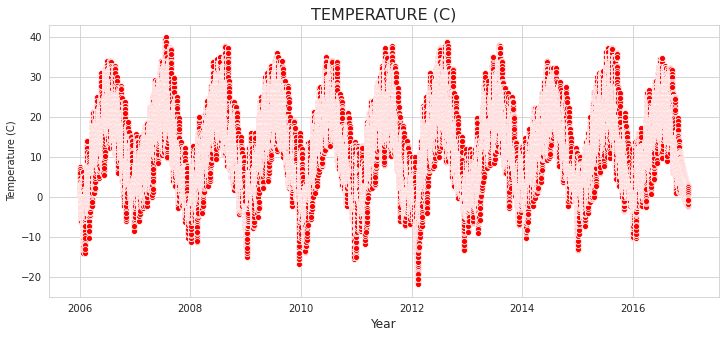

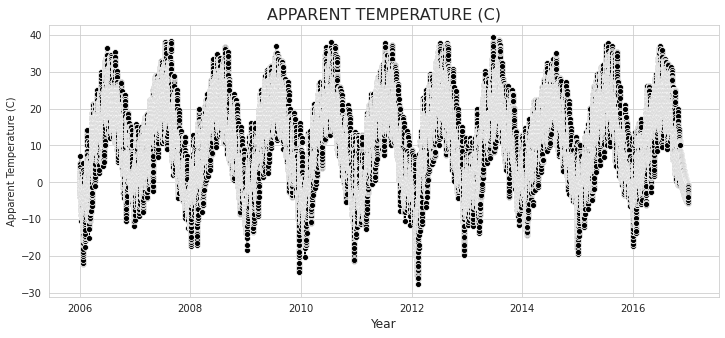

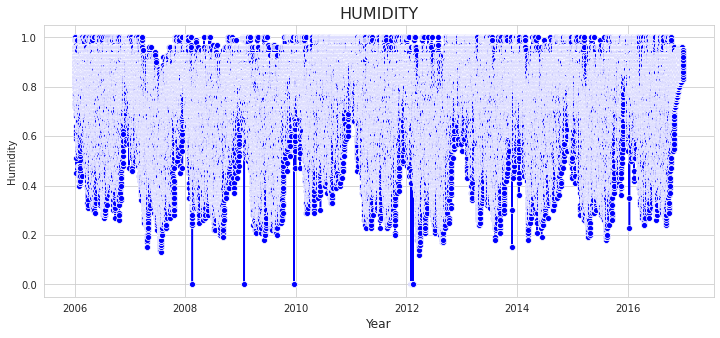

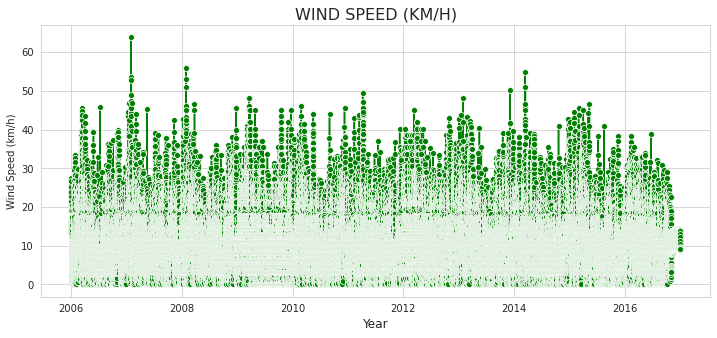

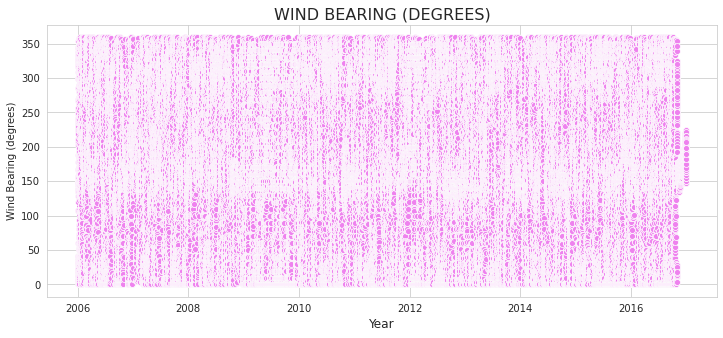

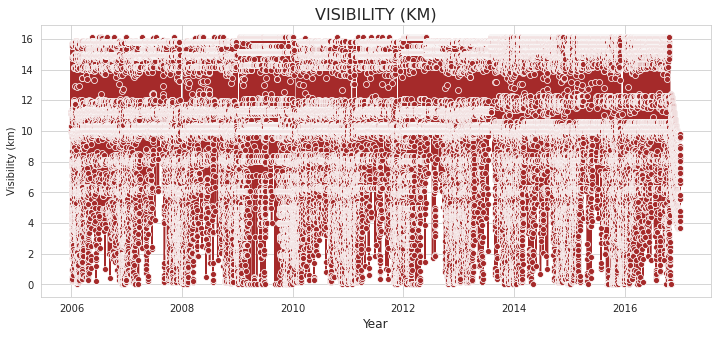

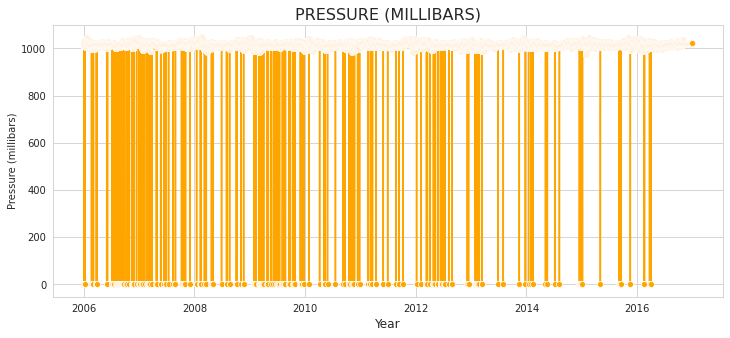

In [227]:
# Plotting Weather Data
color={2:'Red',
       3:'black',
       4:'blue',
       5:'green',
       6:'violet',
       7:'brown',
       8:'orange'}
for index in range(2,9):
    plt.figure(figsize=(12,5))
    plt.xlabel('Year', fontsize=12)
    plt.title('{}'.format(df.columns[index].upper()), fontsize=16)
    sns.lineplot(data=df.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

In [228]:
cols=['Temperature (C)','Humidity','Precip Type','Summary']
df_new=df.loc[:,cols]
df_new.head()

Temperature (C)  Humidity Precip Type        Summary
Formatted Date                                                                 
2006-03-31 22:00:00+00:00         9.472222      0.89        rain  Partly Cloudy
2006-03-31 23:00:00+00:00         9.355556      0.86        rain  Partly Cloudy
2006-04-01 00:00:00+00:00         9.377778      0.89        rain  Mostly Cloudy
2006-04-01 01:00:00+00:00         8.288889      0.83        rain  Partly Cloudy
2006-04-01 02:00:00+00:00         8.755556      0.83        rain  Mostly Cloudy

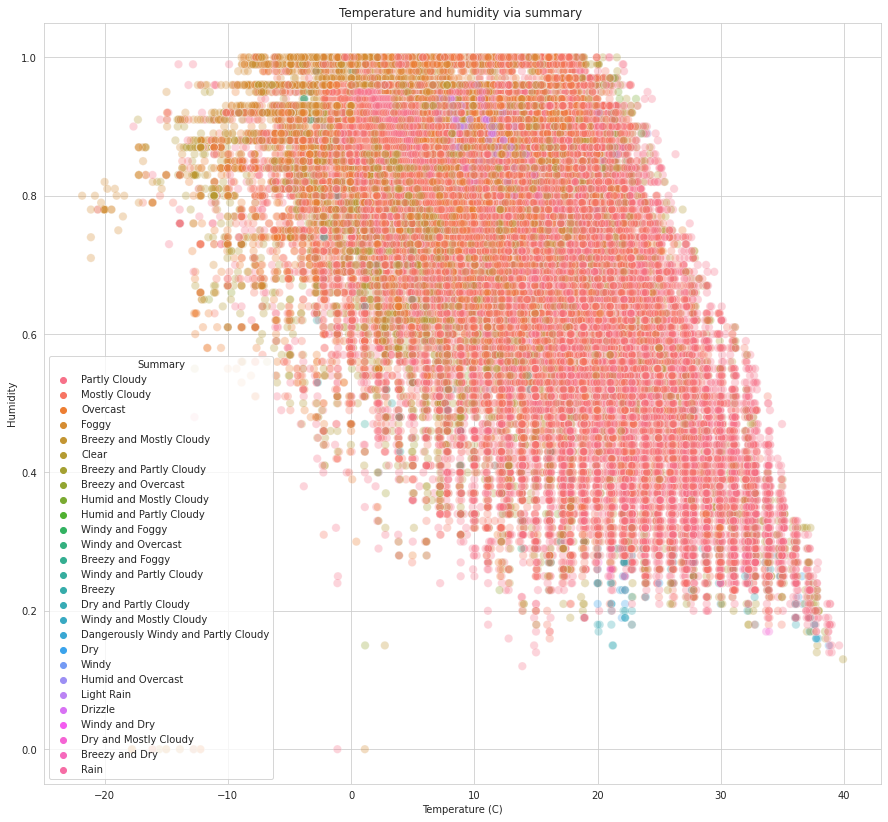

In [229]:
#Temperature and humidity summary wise using scatter plot 
plt.figure(figsize=(15,14))
plt.title('Temperature and humidity via summary ')
sns.scatterplot(x=df_new.iloc[:,0],
                y=df_new.iloc[:,1],
                hue=df_new.iloc[:,3],
                s=70,
                Alpha=0.3)
plt.show()

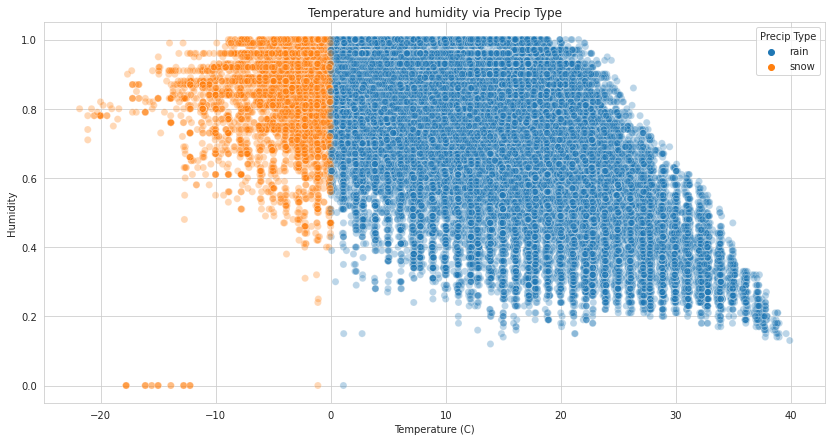

In [230]:
#Temperature and humidity via Precip Type
plt.figure(figsize=(14,7))
plt.title('Temperature and humidity via Precip Type')
sns.scatterplot(x=df_new.iloc[:,0],
                y=df_new.iloc[:,1],
                hue=df_new.iloc[:,2],
                s=50,
                Alpha=0.3)
plt.show()

In [231]:
df_new.describe()

Temperature (C)      Humidity
count     96453.000000  96453.000000
mean         11.932678      0.734899
std           9.551546      0.195473
min         -21.822222      0.000000
25%           4.688889      0.600000
50%          12.000000      0.780000
75%          18.838889      0.890000
max          39.905556      1.000000

In [232]:
#Temperature and humidity by year wise

def plot_year(year):
  data =df_new[df_new.index.year==year]
  plt.figure(figsize=(8,6))
  plt.title('Temperature and Humidity for {}'.format(year))
  sns.scatterplot(x=data.iloc[:,0],
               y=data.iloc[:,1],
               hue=data.iloc[:,2],
              palette=['blue','cyan'],
               s=50,
               alpha=0.3)
  plt.show()

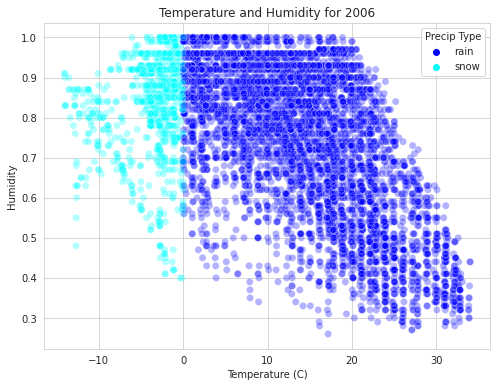

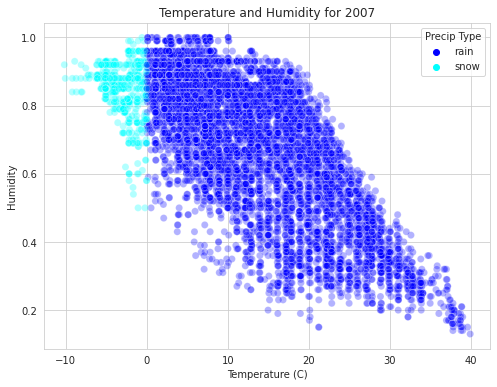

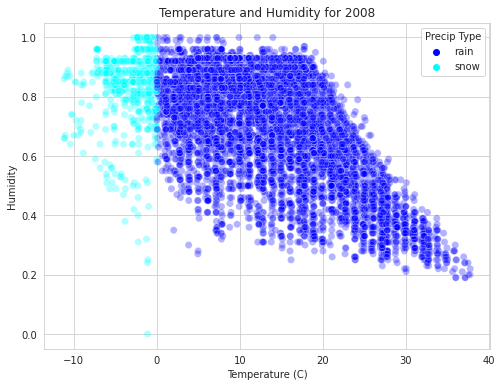

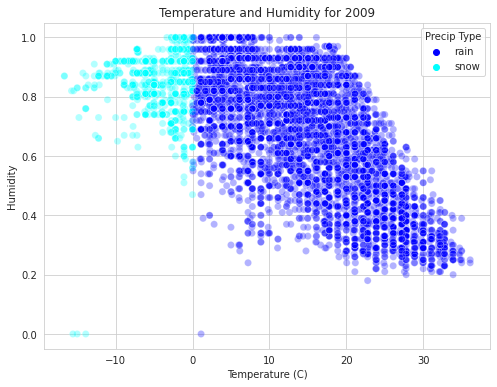

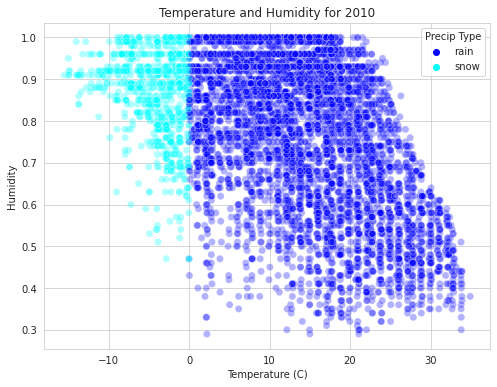

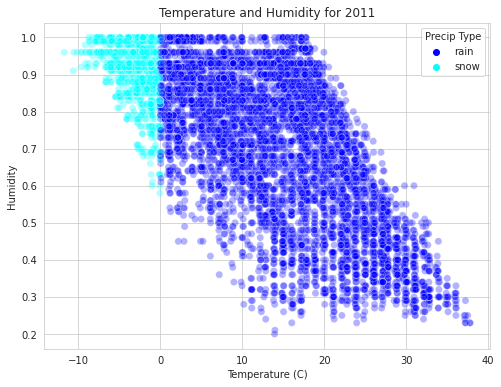

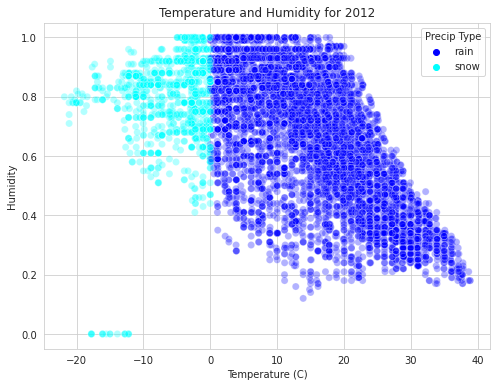

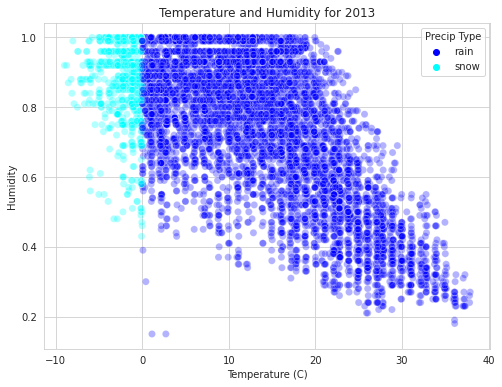

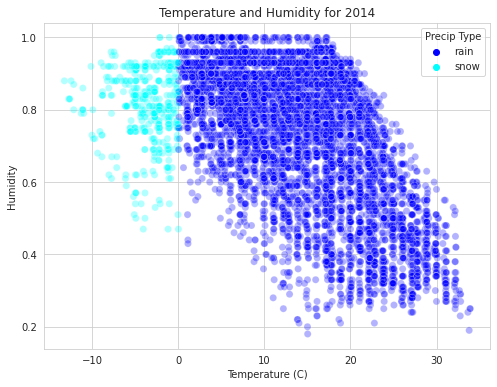

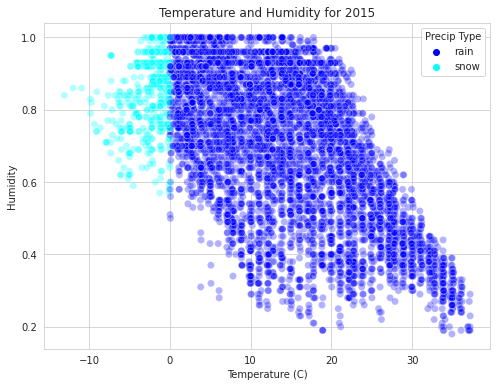

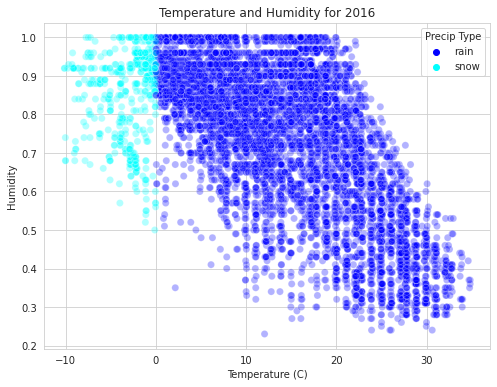

In [233]:
for year in range(2006,2017):
  plot_year(year)

In [234]:
df2 = df[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()
df2

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-01 00:00:00+00:00                 -4.050000  0.890000
2006-01-01 00:00:00+00:00                 -4.173708  0.834610
2006-02-01 00:00:00+00:00                 -2.990716  0.843467
2006-03-01 00:00:00+00:00                  1.969780  0.778737
2006-04-01 00:00:00+00:00                 12.098827  0.728625
...                                             ...       ...
2016-08-01 00:00:00+00:00                 21.383094  0.674046
2016-09-01 00:00:00+00:00                 18.355833  0.688833
2016-10-01 00:00:00+00:00                  8.923947  0.799906
2016-11-01 00:00:00+00:00                  3.048627  0.848472
2016-12-01 00:00:00+00:00                 -2.017272  0.887981

[133 rows x 2 columns]

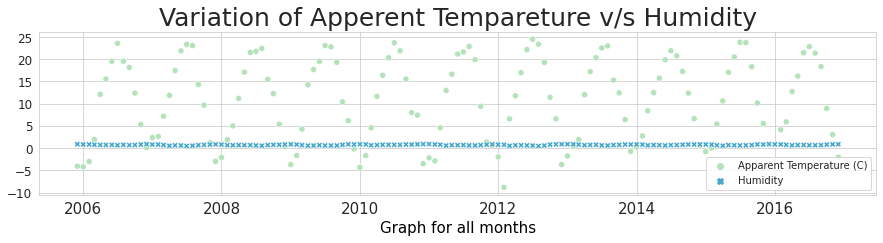

In [235]:
plt.figure(figsize=(15, 3))
plt.title("Variation of Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Graph for all months", fontsize=15, color="Black")
sns.scatterplot(data=df2,palette='GnBu')

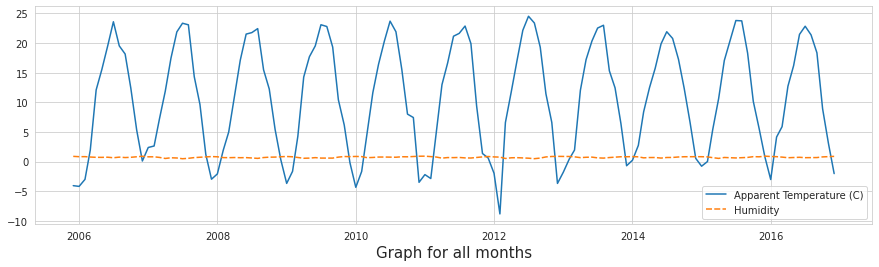

In [236]:
plt.figure(figsize=(15,4))
plt.xlabel("Graph for all months",fontsize=15)
sns.lineplot(data=df2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


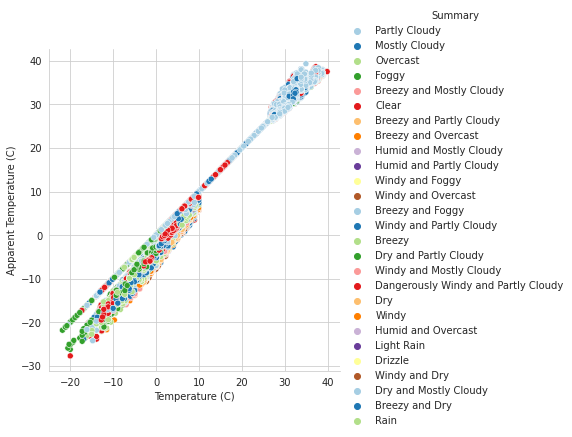

In [237]:
#Relation plot between Temperature and Apparent Temp
sns.relplot(df['Temperature (C)'],df['Apparent Temperature (C)'],palette='Paired',hue=df['Summary'])

#Apperent Tempareture and Humidity on monthly bases of year.

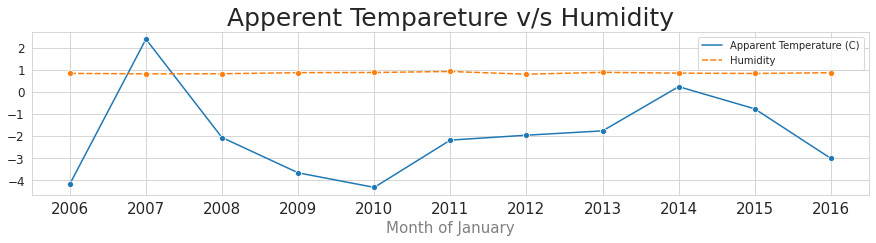

In [238]:
jan_data = df2[df2.index.month==1]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of January", fontsize=15, color="gray")
sns.lineplot(data=jan_data,marker='o')

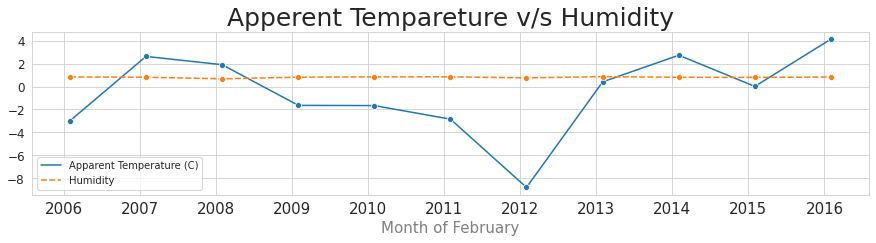

In [239]:
feb_data = df2[df2.index.month==2]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of February", fontsize=15, color="gray")
sns.lineplot(data=feb_data,marker='o')

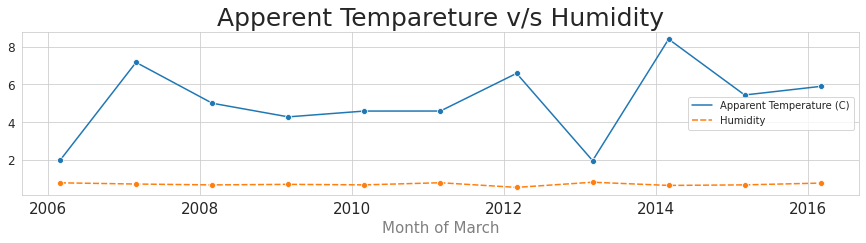

In [240]:
march_data = df2[df2.index.month==3]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of March", fontsize=15, color="gray")
sns.lineplot(data=march_data,marker='o')

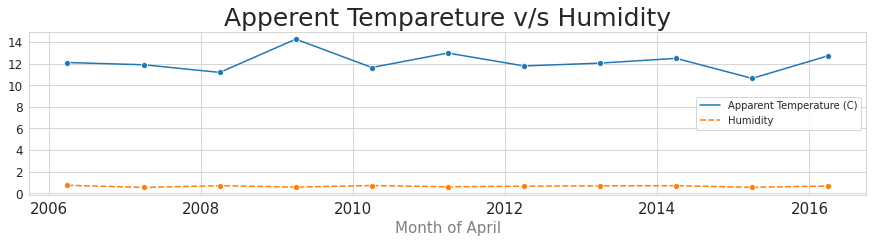

In [241]:
April_data = df2[df2.index.month==4]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of April", fontsize=15, color="gray")
sns.lineplot(data=April_data,marker='o')

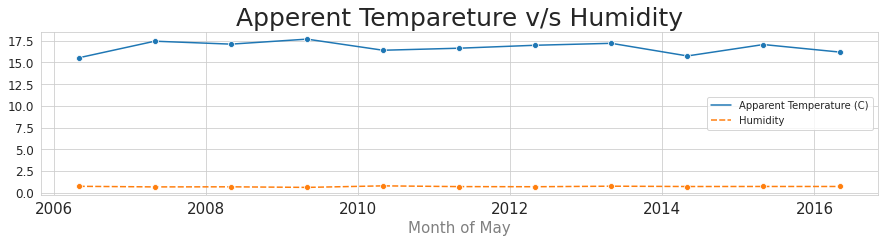

In [242]:
May_data = df2[df2.index.month==5]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of May", fontsize=15, color="gray")
sns.lineplot(data=May_data,marker='o')

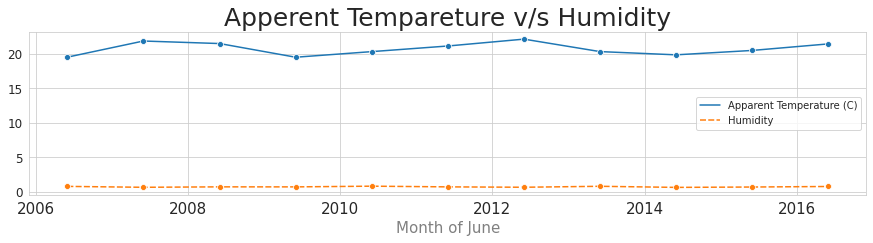

In [243]:
June_data = df2[df2.index.month==6]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of June", fontsize=15, color="gray")
sns.lineplot(data=June_data,marker='o')

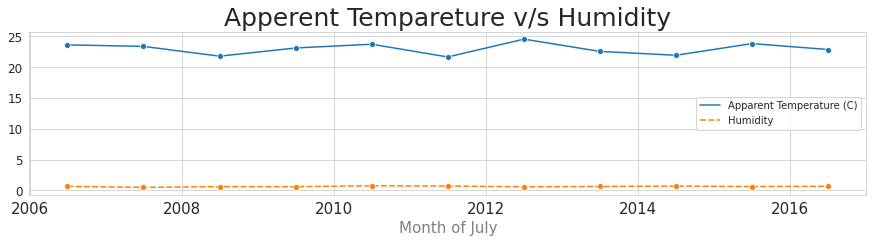

In [244]:
july_data = df2[df2.index.month==7]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of July", fontsize=15, color="gray")
sns.lineplot(data=july_data,marker='o')

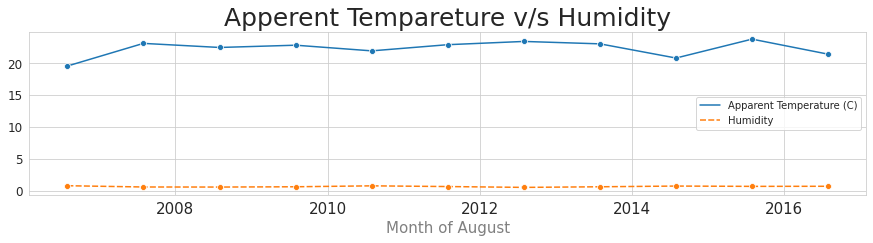

In [245]:
Aug_data = df2[df2.index.month==8]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of August", fontsize=15, color="gray")
sns.lineplot(data=Aug_data,marker='o')

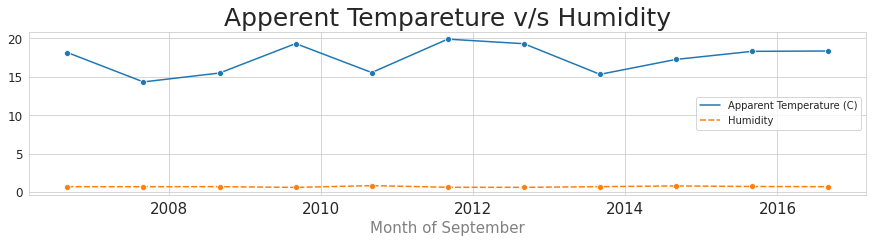

In [246]:
Sep_data= df2[df2.index.month==9]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of September", fontsize=15, color="gray")
sns.lineplot(data=Sep_data,marker='o')

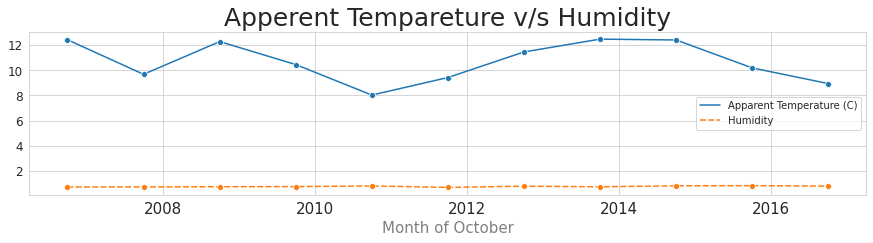

In [247]:
Oct_data= df2[df2.index.month==10]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of October", fontsize=15, color="gray")
sns.lineplot(data=Oct_data,marker='o')

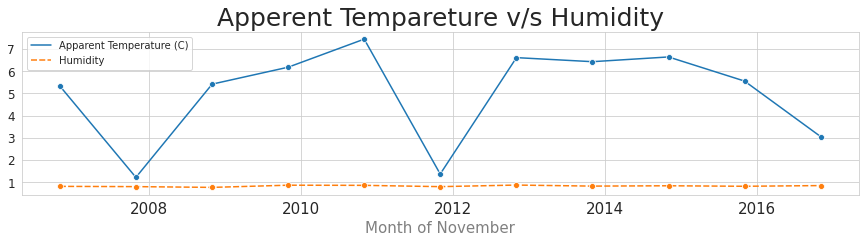

In [248]:
 Nov_data= df2[df2.index.month==11]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of November", fontsize=15, color="gray")
sns.lineplot(data=Nov_data,marker='o')

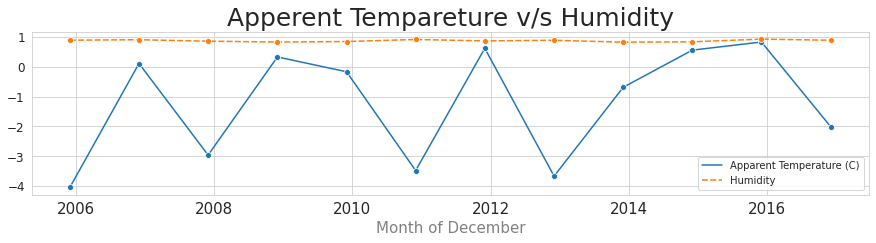

In [249]:
Dec_data= df2[df2.index.month==12]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of December", fontsize=15, color="gray")
sns.lineplot(data=Dec_data,marker='o')

Observation Noted

* Again temperature has been change inconsistently through the year. with specific consistent trend.
* Deviation has been most in the month of Sept,Oct,Nov,Dec (Winter/Spring Season).





#Conclusion:
By analysing the temperature changes, it is proved that there is no continuous rise or fall and even humidity has has been nearly constant throughtout 2006-2016 Therefore we can conclude that H0 is not accepted, so we will accept the H1(Alternative Hypothesis)

#Thank You 